In [1]:
#<<<<<<<<<<<<<< IMPORTING NECESSARY LIBRARIES >>>>>>>>>>>>>>>
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import re
from sklearn.model_selection import train_test_split

In [3]:
#<<<<<<<<<<<<< DATA EXPLORATION >>>>>>>>>>>>>>>
data = pd.read_csv('titanic.csv')
df = data.copy()
df.info()

df.shape
df.describe()
df.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
#<<<<<<<<<<<<<<< FINDING NULL VALUES >>>>>>>>>>>>>>>>>>>>>>
total = df.isnull().sum().sort_values(ascending=False)
print(total)
df.columns.values

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

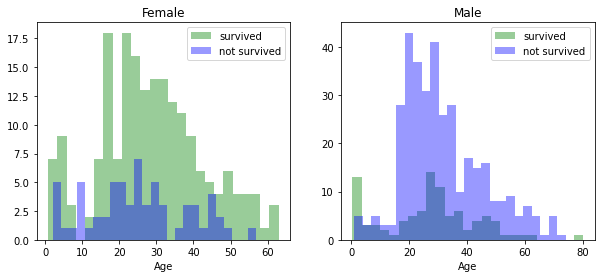

In [5]:
#<<<<<<<<<<< PLOTTING SURVIVAL RATE WITH RESPECT TO AGE AND SEX >>>>>>>>>>>>>>>>
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=25, label = survived, ax = axes[0], kde =False, color='green')
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=25, label = not_survived, ax = axes[0], kde =False, color='blue')
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=25, label = survived, ax = axes[1], kde = False,color='green')
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=25, label = not_survived, ax = axes[1], kde = False , color='blue')
ax.legend()
_ = ax.set_title('Male')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


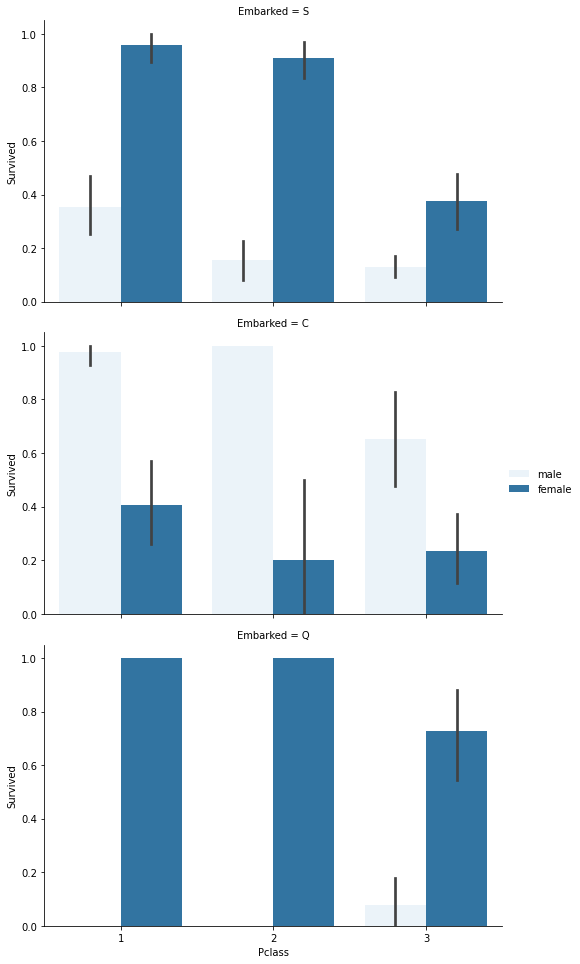

In [6]:
#<<<<<<<< SURVIVAL CHANCES OF MEN AND WOMEN WITH RESPECT TO EMBARKED >>>>>>>>>
g = sns.FacetGrid(df, row = "Embarked", size=4.5, aspect=1.6)
g.map(sns.barplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None  )
#plt.show()
g.add_legend()

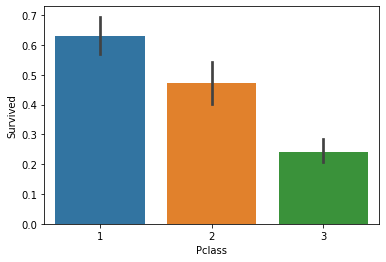

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df)

#<<<<<<<<<< We can see in the output the people of pclass 1 has more chances of survival. so create another to explore more
#<<<<<<<<<< deeply pclass feature

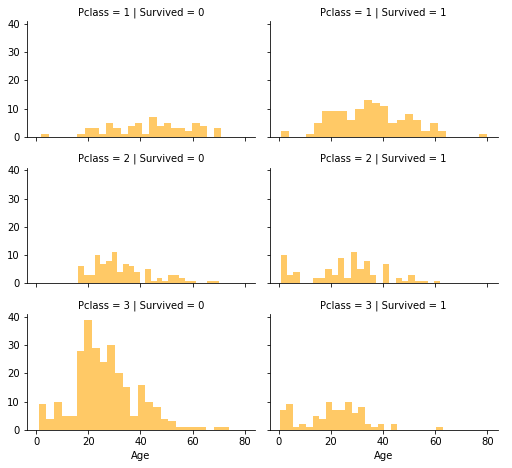

In [8]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.6, bins=25, color = 'orange')
grid.add_legend();

In [9]:
#<<< As col Cabin has no impact and too many missing values therefore we can drop it
df = df.drop(['Cabin'], axis =1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
#<<<< Replace the NaN calues in age by the mean 
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [11]:
#<<<<< Now replace the missing values of Emabrked
df['Embarked'].value_counts()

#<<< As most of values are S therefore we replace the missing values with S

df['Embarked'] = df['Embarked'].fillna('S')

#<<<< Check for nulls again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Sir           1
Lady          1
Jonkheer      1
Capt          1
Countess      1
Don           1
Ms            1
Name: Title, dtype: int64

In [13]:
#<<<<< Now categorize the name titles for more concise data view
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [14]:
#<<<<<<< Change Sex, Title and Embarked column into numeric form
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Sex'].value_counts()

df['Title'].value_counts()
df['Title'] = df['Title'].astype('category').cat.codes
df['Title'].value_counts()

df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['Embarked'].value_counts()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2


In [15]:
#<<<< drop un necesary columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.shape

(891, 9)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


In [17]:
#<<<<<<<<<<< Split the data set into trainning and testing data

X = df.drop('Survived', axis=1)#y= labels ie has to predict x=features=u train on x
Y = df['Survived']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 8) (623,)
(268, 8) (268,)


In [37]:
#<<<<<<<<<< Apply the Model Random Forest
model = RandomForestClassifier(n_estimators=50, min_samples_split=5, n_jobs=2, random_state=12)
#model = RandomForestClassifier(n_estimators=50, min_samples_split=5, n_jobs=2, random_state=10)
model.fit(xtrain.values, ytrain.values)
pred = model.predict(xtest)
xt = xtest.copy()
xt['Pred'] = pred
xt['actual'] = ytest
xt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Pred,actual
560,3,1,29.699118,0,0,7.7500,1,2,0,0
246,3,0,25.000000,0,0,7.7750,2,1,1,0
309,1,0,30.000000,0,0,56.9292,0,1,1,1
232,2,1,59.000000,0,0,13.5000,2,2,0,0
131,3,1,20.000000,0,0,7.0500,2,2,0,0


In [38]:
print(model.score(xtest.values, ytest.values)) #to chk the accuracy of the model .score

0.7947761194029851


In [44]:
model.predict(np.array([1,0,30,0,0,56.9292,0,1]).reshape(1,8))

array([1], dtype=int64)